In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import torch
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix

def report_performance(predictions, labels):
    genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
    
        
    if type(predictions).__module__ == torch.__name__ :
        predictions = predictions.tolist()
    if type(labels).__module__ == torch.__name__ :
        labels = labels.tolist()
    
    if type(predictions).__module__ == np.__name__ :
        predictions = list(predictions)
    if type(labels).__module__ == np.__name__ :
        labels = list(labels)
    

    
    size = len(genres);
    i = 0;
    
    while i < 10:
        if i in predictions:        
            for j, x in enumerate(predictions):
                if x == i:
                   predictions[j] = genres[i + size - 10]
        if i in labels:
            for j, x in enumerate(labels):
                if x == i: 
                    labels[j] = genres[i + size - 10]
        else: 
            del genres[i + size - 10]
            size -= 1
        i+=1; 
          

    data = {'y_Actual':    labels,
            'y_Predicted': predictions
            }
    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
   
    sn.heatmap(confusion_matrix, annot=True)
    plt.show()
    print(classification_report(labels, predictions))
    
    cnf = multilabel_confusion_matrix(labels, predictions)

    for i in range(0, len(genres)):
        if (cnf[i][0][1]+cnf[i][1][1]) != 0:
            print("Accuracy for", genres[i], "is:", cnf[i][1][1]/(cnf[i][0][1]+cnf[i][1][1]), "\n")

In [0]:
import tensorflow as tf
from tensorflow.keras import regularizers

In [7]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(8, (5,5),activation='relu', input_shape=(400, 1000, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(8, (5,5),activation='relu'),

    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(16, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 396, 996, 8)       608       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 198, 498, 8)       0         
_________________________________________________________________
dropout (Dropout)            (None, 198, 498, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 194, 494, 8)       1608      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 97, 247, 8)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 97, 247, 8)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 95, 245, 16)       1

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
),
              metrics=['accuracy'])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/25,validation_split = 0.40,)
# test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        '/content/gdrive/My Drive/machine learning/mel_spec_data.zip/', 
        target_size=(400, 1000),  
        batch_size=32,
        class_mode='categorical',
        subset="training")

validation_generator = train_datagen.flow_from_directory(
    '/content/gdrive/My Drive/machine learning/mel_spec_data.zip/', # same directory as training data
    target_size=(400,1000),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data

# test_generator = test_datagen.flow_from_directory(
#     'test/test',
#     target_size=(120,120),
#     batch_size=128,
#     class_mode='categorical',  
# ) 

FileNotFoundError: ignored

In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=25,
      validation_data = validation_generator, 
      validation_steps = 8,
      verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
8/8 [==============================] - 135s 17s/step - loss: 215.9855 - accuracy: 0.1250 - val_loss: 3.1859 - val_accuracy: 0.0938
Epoch 2/25
8/8 [==============================] - 89s 11s/step - loss: 17.5791 - accuracy: 0.1367 - val_loss: 2.3033 - val_accuracy: 0.1667
Epoch 3/25
8/8 [==============================] - 66s 8s/step - loss: 2.7175 - accuracy: 0.1290 - val_loss: 2.2975 - val_accuracy: 0.1167
Epoch 4/25
8/8 [==============================] - 68s 9s/step - loss: 2.2964 - accuracy: 0.1289 - val_loss: 2.2994 - val_accuracy: 0.1562
Epoch 5/25
8/8 [==============================] - 66s 8s/step - loss: 2.3010 - accuracy: 0.1210 - val_loss: 2.3024 - val_accuracy: 0.0875
Epoch 6/25
8/8 [==============================] - 67s 8s/step - loss: 2.3011 - accuracy: 0.1367 - val_loss: 2.3015 - val_accuracy: 0.1375
Epoch 7/25
8/8 [==============================] - 68s 9s/step - loss: 2.3002 - accuracy: 0

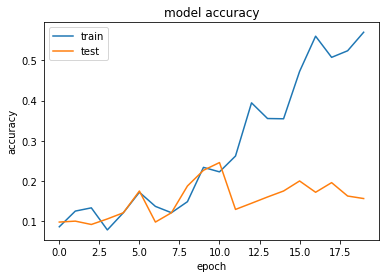

In [0]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

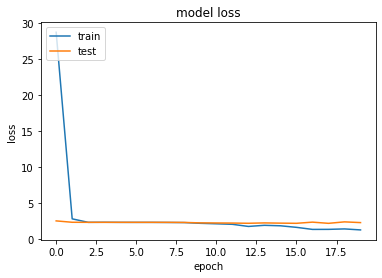

In [0]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
pred = model.evaluate( )